In [1]:
import pandas as pd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
from pandas import merge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
%matplotlib inline


In [2]:

icu_cases_path =  'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/icu.csv'
vax_malaysia_path = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/vaccination/vax_malaysia.csv'
death_malaysia_path = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_malaysia.csv'
cases_malaysia_path = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv'

In [3]:
beginningDate = '2021-01-01'
endingDate = '2021-06-30'

In [4]:
icu_cases = pd.read_csv(icu_cases_path, usecols= ['date', 'state', 'beds_icu_covid'], parse_dates= ['date'])
vax_malaysia = pd.read_csv(vax_malaysia_path)
death_malaysia = pd.read_csv(death_malaysia_path)
cases_malaysia = pd.read_csv(cases_malaysia_path)

icu_cases['date'] = pd.to_datetime(icu_cases['date'])
vax_malaysia['date'] = pd.to_datetime(vax_malaysia['date'])

icu_cases = icu_cases[icu_cases['date'] >= beginningDate]
icu_cases = icu_cases[icu_cases['date'] <= endingDate]

vax_malaysia = vax_malaysia[vax_malaysia['date'] >= beginningDate]
vax_malaysia = vax_malaysia[vax_malaysia['date'] <= endingDate]

death_malaysia = death_malaysia[death_malaysia['date'] >= beginningDate]
death_malaysia = death_malaysia[death_malaysia['date'] <= endingDate]

cases_malaysia = cases_malaysia[cases_malaysia['date'] >= beginningDate]
cases_malaysia = cases_malaysia[cases_malaysia['date'] <= endingDate]
#print(vax_malaysia.head(5))

In [5]:
#filter wanted features (column) 
vaxStatus = pd.DataFrame(cases_malaysia, columns= ['date', 'cases_unvax', 'cases_pvax', 'cases_fvax'])
icuCasesTotal = pd.DataFrame(icu_cases, columns= ['date', 'beds_icu_covid'])
allAgesCases = pd.DataFrame(cases_malaysia, columns= ['date', 'cases_elderly', 'cases_adult', 'cases_adolescent', 'cases_child'])
casesNum = pd.DataFrame(cases_malaysia, columns= ['date', 'cases_new'])
death = pd.DataFrame(death_malaysia, columns= ['date', 'deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost', 'deaths_new'])

#sort wanted features (column) 
vaxStatus = vaxStatus.groupby('date').sum()
icuCasesTotal = icuCasesTotal.groupby('date').sum()
allAgesCases = allAgesCases.groupby('date').sum()
death = death.groupby('date').sum()

#merge wanted features 
features = casesNum.merge(allAgesCases, on='date', how=  'left')
features = features.merge(vaxStatus, on= 'date', how= 'left')
features= features.merge(death, on='date', how='left')
features = features.fillna(0)

# deletes the date column
del features['date'] 



#display features 
print(features)

     cases_new  cases_elderly  cases_adult  cases_adolescent  cases_child  \
0         2068            115         1715                78          129   
1         2295            113         1895                60          122   
2         1704            114         1307                71          170   
3         1741            103         1346                72          178   
4         2027            125         1610                87          176   
..         ...            ...          ...               ...          ...   
176       5803            464         4280               326          573   
177       5586            424         4174               316          566   
178       5218            385         3755               348          644   
179       6437            517         4191               367          744   
180       6276            507         4401               377          781   

     cases_unvax  cases_pvax  cases_fvax  deaths_unvax  deaths_pvax  \
0   

In [6]:
# copies the dataframe to X
x = features.copy()

# copies the death_new column to y
y = features['deaths_new']

# deletes the death_new column from X
del x['deaths_new'] 


0.05454545454545454
[60  8  5  3  4  7 11  3  2  4  3  2 11  2 14  3  3  4 11 15  2 49  7  4
 25  2  7  3  7 60 49  7 11 57 59  4 59  1 60  7  2 59  4  4  1  2 49  2
  2 11  4 50 57  8  1]


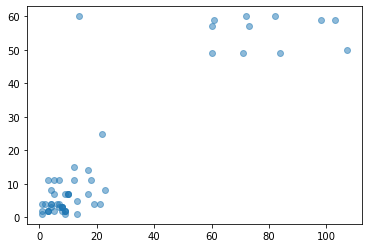

In [7]:
#KNN
# Get the train set which still contains the y in it
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 

# Create a N-Nearest Neighbors classifier of 9 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to training set
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(y_pred)


ax=plt.axes()
ax.scatter(y_test,y_pred,alpha=.5)


[ 11.13216736  10.32368853  90.02060392  13.85415147   7.47151051
   4.52124246  84.72461478  12.1091727    8.99281323  22.1918622
  16.0021299   74.4282708   12.32431856   5.73053293  48.39149921
   8.03533425  22.96517076  71.6882386   13.71974769   6.47389929
   6.99264401   6.40044384  72.02844658   5.1796398   73.5098024
   7.53994394   5.26332841   6.80281055   7.66879231  89.07305455
  12.99371968  13.16238762  70.12712326   5.85081933  14.95987553
  32.95024087  11.44251585 104.82211681  21.84828589   9.17445304
   8.30786343   5.30505605  11.70393066  10.94769062   8.24181548
   4.67583533  71.65484136   5.11557547   7.77376313  66.48443758
   5.34108909   5.10406818  10.79123663   6.90390664  55.72471524]


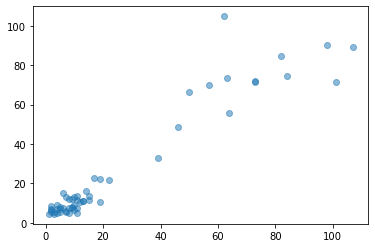

In [10]:
#Linear regression
# Get the train set which still contains the y in it
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 
model= LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
ax = plt.axes()
print(y_pred)
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_pred, alpha=.5)


0.0136986301369863


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


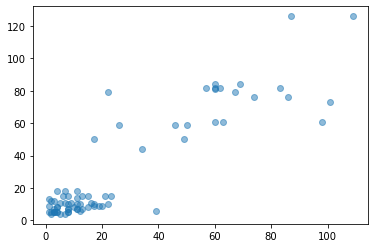

In [13]:
LogisticRegression(max_iter=500) 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4) 

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(model.score(x_test,y_test))
ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)